In [167]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

**Dataset Loading and Data Wrangling :-**

In [168]:
# Loading channel_details data
channel_details=pd.read_csv('channel_details.csv')
channel_details

,Name,Description,Subscribers,Channel Published,Total Views,Total Videos
0,Unfiltered by Samdish (and a fantastic team),"If you like our work, you can become an active...",2560000,2012-12-13T21:35:56Z,214280912,144


In [169]:
channel_details.shape

(1, 6)

In [170]:
channel_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Name               1 non-null      object
 1   Description        1 non-null      object
 2   Subscribers        1 non-null      int64 
 3   Channel Published  1 non-null      object
 4   Total Views        1 non-null      int64 
 5   Total Videos       1 non-null      int64 
dtypes: int64(3), object(3)
memory usage: 180.0+ bytes


In [171]:
# TypeCasting the Object type to Date type
channel_details['Channel Published'] = pd.to_datetime(channel_details['Channel Published'], utc=True)
channel_details['Channel Published'].dtype

datetime64[ns, UTC]

In [172]:
channel_details

,Name,Description,Subscribers,Channel Published,Total Views,Total Videos
0,Unfiltered by Samdish (and a fantastic team),"If you like our work, you can become an active...",2560000,2012-12-13 21:35:56+00:00,214280912,144


In [173]:
# Loading channel_videos data
channel_videos=pd.read_csv('channel_videos.csv')
channel_videos.head()

,video_id,title,description,published,views,likes,comments,Category,duration,Definition
0,glCkSw1bCa8,The Film Critic No One Asked For ft. Imran Khan,The best tongue twister award goes to the love...,2025-12-26T14:31:31Z,765925,30168,2172,24,PT1H2M26S,hd
1,f22L9t_G0-A,"One CM At A Time (If You Know, You Know) - Sor...","For this episode, I travelled all the way to S...",2025-12-19T14:30:06Z,712687,23482,2690,24,PT58M8S,hd
2,Gn8A_GsAxLA,I Discovered The Tribal Culture Like Never Bef...,Trigger Warning:\nThis video contains scenes o...,2025-12-04T14:30:13Z,482751,14592,1210,24,PT46M48S,hd
3,IX1bW7nk2us,The Coolest Anupam Kher Interview Ever?,In the hope of nailing the art of Bollywood in...,2025-11-28T14:30:15Z,1003066,23471,2845,24,PT47M50S,hd
4,lsLZYaGSsFA,Freestyle Chilling Ft. Farhan The Akhtar,Farhan Akhtar meets Unfiltered — and obviously...,2025-11-21T14:01:31Z,1535807,38858,3303,24,PT50M27S,hd


In [174]:
channel_videos.shape

(139, 10)

In [175]:
channel_videos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   video_id     139 non-null    object
 1   title        139 non-null    object
 2   description  139 non-null    object
 3   published    139 non-null    object
 4   views        139 non-null    int64 
 5   likes        139 non-null    int64 
 6   comments     139 non-null    int64 
 7   Category     139 non-null    int64 
 8   duration     139 non-null    object
 9   Definition   139 non-null    object
dtypes: int64(4), object(6)
memory usage: 11.0+ KB


In [176]:
# TypeCasting the Object type to Date type
channel_videos['published'] = pd.to_datetime(channel_videos['published'], utc=True)
channel_videos['published'].dtype

datetime64[ns, UTC]

In [177]:
# converting the videos duration in minute
channel_videos['duration_minute'] = pd.to_timedelta(channel_videos['duration'])
channel_videos['duration_minute'] = channel_videos['duration_minute'].dt.total_seconds() / 60

channel_videos['duration_minute'].head()

,duration_minute
0,62.433333
1,58.133333
2,46.800000
3,47.833333
4,50.450000


In [178]:
def parse_duration(duration_str):
    """Parses ISO 8601 duration format (e.g., PT1H2M3S) into total seconds."""
    match = re.match(r'PT(?:(\d+)H)?(?:(\d+)M)?(?:(\d+)S)?', duration_str)
    if not match:
        return 0
    hours = int(match.group(1)) if match.group(1) else 0
    minutes = int(match.group(2)) if match.group(2) else 0
    seconds = int(match.group(3)) if match.group(3) else 0
    return hours * 3600 + minutes * 60 + seconds

channel_videos['duration_seconds'] = channel_videos['duration'].apply(parse_duration)
channel_videos['duration_minutes'] = channel_videos['duration_seconds'] / 60

In [179]:
channel_videos.head()

,video_id,title,description,published,views,likes,comments,Category,duration,Definition,duration_minute,duration_seconds,duration_minutes
0,glCkSw1bCa8,The Film Critic No One Asked For ft. Imran Khan,The best tongue twister award goes to the love...,2025-12-26 14:31:31+00:00,765925,30168,2172,24,PT1H2M26S,hd,62.433333,3746,62.433333
1,f22L9t_G0-A,"One CM At A Time (If You Know, You Know) - Sor...","For this episode, I travelled all the way to S...",2025-12-19 14:30:06+00:00,712687,23482,2690,24,PT58M8S,hd,58.133333,3488,58.133333
2,Gn8A_GsAxLA,I Discovered The Tribal Culture Like Never Bef...,Trigger Warning:\nThis video contains scenes o...,2025-12-04 14:30:13+00:00,482751,14592,1210,24,PT46M48S,hd,46.800000,2808,46.800000
3,IX1bW7nk2us,The Coolest Anupam Kher Interview Ever?,In the hope of nailing the art of Bollywood in...,2025-11-28 14:30:15+00:00,1003066,23471,2845,24,PT47M50S,hd,47.833333,2870,47.833333
4,lsLZYaGSsFA,Freestyle Chilling Ft. Farhan The Akhtar,Farhan Akhtar meets Unfiltered — and obviously...,2025-11-21 14:01:31+00:00,1535807,38858,3303,24,PT50M27S,hd,50.450000,3027,50.450000


In [180]:
# Loading video_comments data
video_comments=pd.read_csv('youtube_video_comments.csv')
video_comments.head()

,video_id,author,comment,likes,published
0,glCkSw1bCa8,@atifraza2333,boring ....😴😴😴😴😴😴😴😴😴😴😴😪😪😪😪😪😪😔😔😔😔😔😔😮‍💨😮‍💨😮‍💨😮‍💨...,0,2026-01-10T12:47:13Z
1,glCkSw1bCa8,@ajayvarma77,Can't wait this much for next video,0,2026-01-10T06:27:51Z
2,glCkSw1bCa8,@akilahmed2825,54:56,1,2026-01-10T05:13:26Z
3,glCkSw1bCa8,@anubhavpaulux,Bhai bengal election main ajao😂,0,2026-01-10T03:54:23Z
4,glCkSw1bCa8,@Mia-l5v7t,I love Imran❤,0,2026-01-09T19:49:20Z


In [181]:
video_comments.shape

(27419, 5)

In [182]:
video_comments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27419 entries, 0 to 27418
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   video_id   27419 non-null  object
 1   author     27415 non-null  object
 2   comment    27415 non-null  object
 3   likes      27419 non-null  int64 
 4   published  27419 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.0+ MB


In [183]:
# Type Casting the Object type to Date type
video_comments['published'] = pd.to_datetime(video_comments['published'], utc=True)
video_comments['published'].dtype

datetime64[ns, UTC]

In [184]:
# Loading youtube_video_transcript data
video_trasnscript=pd.read_csv('youtube_video_transcript.csv')
video_trasnscript.head()

,video_id,transcript,language
0,f22L9t_G0-A,ब्रदर्स एंड सिस्टर्स इन द एंडेवर ऑफ पुशिंग द ब...,hi
1,Gn8A_GsAxLA,अगर आपसे कोई पूछे कि आप करते क्या हो? तो आप क्...,hi
2,IX1bW7nk2us,[संगीत] देखिए भैया अमीरियत और सेलिब्रिटी होने ...,hi
3,lsLZYaGSsFA,आप मुझे बताओ पूजा भट्ट और कुणाल के वो रिश्ते म...,hi
4,TRVdHO79Y-M,समाज को समझने में जो बहुत बड़ा खतरा होता है ना...,hi


In [185]:
video_trasnscript.shape

(135, 3)

In [186]:
# Merging "channel_videos" DataFrame and "video_transcript" DataFrame
video_data_df = pd.merge(channel_videos, video_trasnscript, on='video_id', how='inner')
video_data_df.head()

,video_id,title,description,published,views,likes,comments,Category,duration,Definition,duration_minute,duration_seconds,duration_minutes,transcript,language
0,f22L9t_G0-A,"One CM At A Time (If You Know, You Know) - Sor...","For this episode, I travelled all the way to S...",2025-12-19 14:30:06+00:00,712687,23482,2690,24,PT58M8S,hd,58.133333,3488,58.133333,ब्रदर्स एंड सिस्टर्स इन द एंडेवर ऑफ पुशिंग द ब...,hi
1,Gn8A_GsAxLA,I Discovered The Tribal Culture Like Never Bef...,Trigger Warning:\nThis video contains scenes o...,2025-12-04 14:30:13+00:00,482751,14592,1210,24,PT46M48S,hd,46.800000,2808,46.800000,अगर आपसे कोई पूछे कि आप करते क्या हो? तो आप क्...,hi
2,IX1bW7nk2us,The Coolest Anupam Kher Interview Ever?,In the hope of nailing the art of Bollywood in...,2025-11-28 14:30:15+00:00,1003066,23471,2845,24,PT47M50S,hd,47.833333,2870,47.833333,[संगीत] देखिए भैया अमीरियत और सेलिब्रिटी होने ...,hi
3,lsLZYaGSsFA,Freestyle Chilling Ft. Farhan The Akhtar,Farhan Akhtar meets Unfiltered — and obviously...,2025-11-21 14:01:31+00:00,1535807,38858,3303,24,PT50M27S,hd,50.450000,3027,50.450000,आप मुझे बताओ पूजा भट्ट और कुणाल के वो रिश्ते म...,hi
4,TRVdHO79Y-M,My Lovely Experience In The Not-So-18th-Centur...,While Bihar prepares itself for the very antic...,2025-11-08 15:45:21+00:00,936103,26796,1716,24,PT27M5S,hd,27.083333,1625,27.083333,समाज को समझने में जो बहुत बड़ा खतरा होता है ना...,hi


In [187]:
video_data_df.to_csv('video_data.csv', index=False)

**Finding Insights**

In [188]:
# finding the frquency of uploading videos per month for last one year.
from datetime import datetime, timedelta

cutoff = pd.Timestamp.utcnow().tz_convert('UTC') - pd.Timedelta(days=30*12)

recent_videos = video_data_df[video_data_df['published'] >= cutoff]
x=round(len(recent_videos) / 12, 2)
print(f'''Videos Uploading frequency per month for last one year is
"{x}"''')

Videos Uploading frequency per month for last one year is 
"2.33"


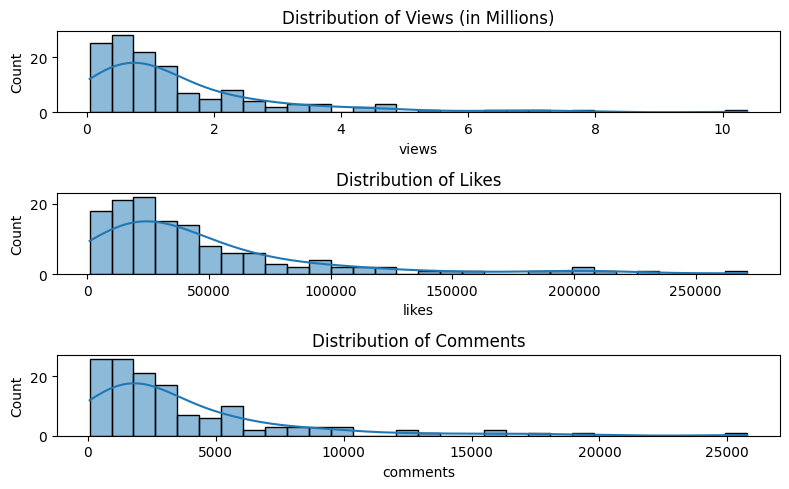

In [189]:
# Distribution of Views, Likes, and Comments
fig, axes = plt.subplots(3, 1, figsize=(8, 5))
sns.histplot(video_data_df['views']/1000000, bins=30, kde=True, ax=axes[0]).set_title('Distribution of Views (in Millions)')
sns.histplot(video_data_df['likes'], bins=30, kde=True, ax=axes[1]).set_title('Distribution of Likes')
sns.histplot(video_data_df['comments'], bins=30, kde=True, ax=axes[2]).set_title('Distribution of Comments')
plt.tight_layout()
plt.show()
# plt.savefig('distributions.png')

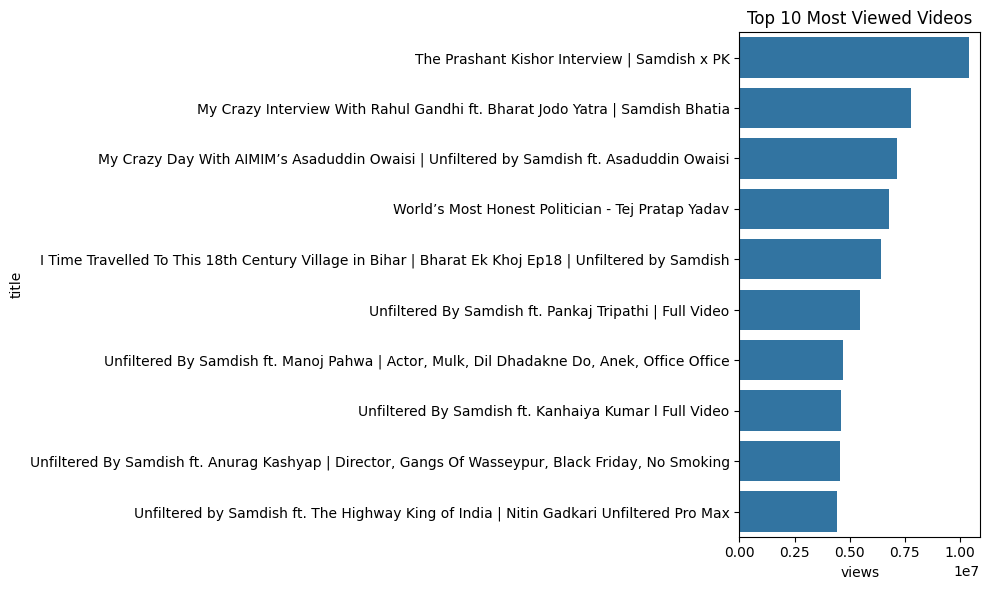

In [194]:
# Top 10 Most Viewed Videos
top_10_viewed_videos = video_data_df.nlargest(10, 'views')[['title', 'views']]
plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_viewed_videos, x='views', y='title')
plt.title('Top 10 Most Viewed Videos')
plt.tight_layout()
plt.show()

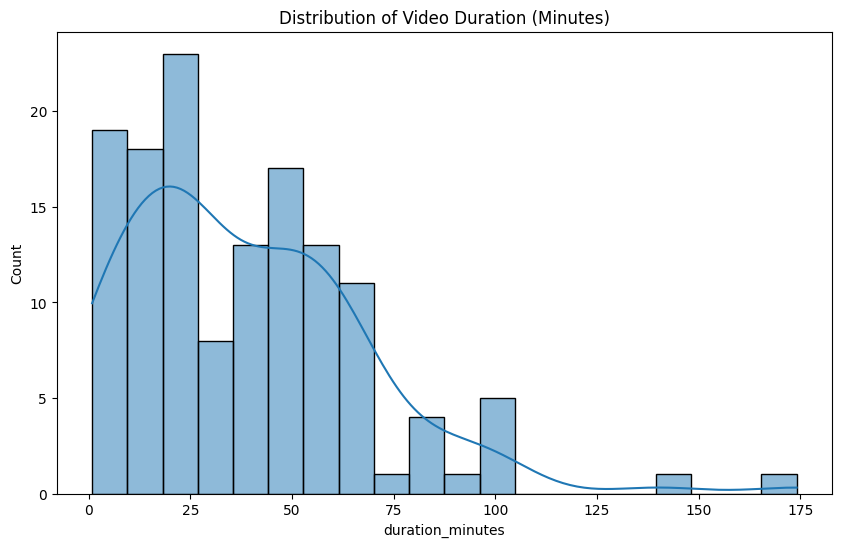

In [191]:
plt.figure(figsize=(10, 6))
sns.histplot(video_data_df['duration_minutes'], bins=20, kde=True)
plt.title('Distribution of Video Duration (Minutes)')
plt.savefig('duration_dist.png')

In [192]:
print("Summary Statistics:")
print(video_data_df[['views', 'likes', 'comments', 'duration_minutes']].describe())

Summary Statistics:
              views          likes      comments  duration_minutes
count  1.350000e+02     135.000000    135.000000        135.000000
mean   1.529133e+06   48732.748148   3763.792593         38.399259
std    1.678067e+06   50567.357708   4146.287532         29.732115
min    4.561700e+04     957.000000     68.000000          0.866667
25%    4.917785e+05   17284.500000   1369.500000         16.741667
50%    9.924600e+05   31747.000000   2379.000000         32.150000
75%    1.944269e+06   62289.500000   4909.500000         56.650000
max    1.038478e+07  271156.000000  25770.000000        174.066667
